Mounted at /content/drive
PROJECT_ROOT: /content/drive/MyDrive/aerial_project
CLASSIFICATION_DIR exists: True
DETECTION_DIR exists: True
Found 2662 files belonging to 2 classes.
Found 442 files belonging to 2 classes.
Found 215 files belonging to 2 classes.


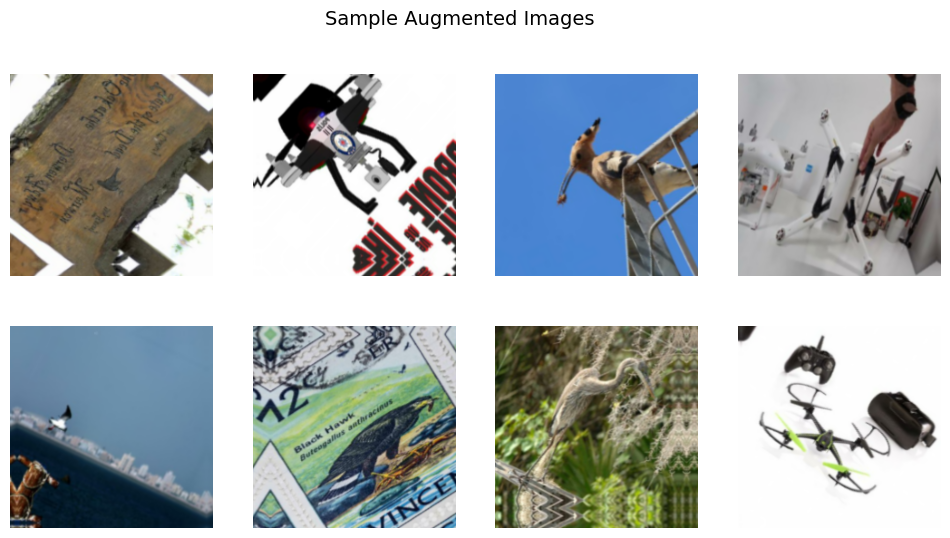


Data augmentation visualization complete. Proceed to 03_train_custom_cnn.ipynb


In [1]:
#Colab: 02_preprocess_augment.ipynb
#Purpose is to Load dataset+visualize+apply augmentation
#1.Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#2.project paths
import os
PROJECT_ROOT='/content/drive/MyDrive/aerial_project'
CLASSIFICATION_DIR=os.path.join(PROJECT_ROOT, 'classification_dataset')
DETECTION_DIR=os.path.join(PROJECT_ROOT, 'object_detection_Dataset')
SAVED_MODELS=os.path.join(PROJECT_ROOT, 'saved_models')
RESULTS_DIR=os.path.join(PROJECT_ROOT, 'results')

os.makedirs(SAVED_MODELS, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

print('PROJECT_ROOT:', PROJECT_ROOT)
print('CLASSIFICATION_DIR exists:', os.path.exists(CLASSIFICATION_DIR))
print('DETECTION_DIR exists:', os.path.exists(DETECTION_DIR))

#3.loading the dataset
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE=(224, 224)
BATCH_SIZE=32
train_ds=image_dataset_from_directory(
    os.path.join(CLASSIFICATION_DIR, 'train'),
    labels='inferred', label_mode='int',
    image_size=IMG_SIZE, batch_size=BATCH_SIZE, shuffle=True)

val_ds=image_dataset_from_directory(
    os.path.join(CLASSIFICATION_DIR, 'valid'),
    labels='inferred', label_mode='int',
    image_size=IMG_SIZE, batch_size=BATCH_SIZE, shuffle=False)

test_ds=image_dataset_from_directory(
    os.path.join(CLASSIFICATION_DIR, 'test'),
    labels='inferred', label_mode='int',
    image_size=IMG_SIZE, batch_size=BATCH_SIZE, shuffle=False)

AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.prefetch(AUTOTUNE)
val_ds=val_ds.prefetch(AUTOTUNE)
test_ds=test_ds.prefetch(AUTOTUNE)

#4.data augmentation
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
], name='data_augmentation')

#5.visualizing augmented samples
import matplotlib.pyplot as plt
for images, labels in train_ds.take(1):
    augmented_images=data_augmentation(images)
    fig, axs=plt.subplots(2, 4, figsize=(12, 6))
    for i in range(8):
        ax=axs[i//4, i%4]
        ax.imshow(augmented_images[i].numpy().astype('uint8'))
        ax.axis('off')
    plt.suptitle("Sample Augmented Images", fontsize=14)
    plt.show()

#6.saving dataset references for next notebook (optional)
print("\nData augmentation visualization complete. Proceed to 03_train_custom_cnn.ipynb")